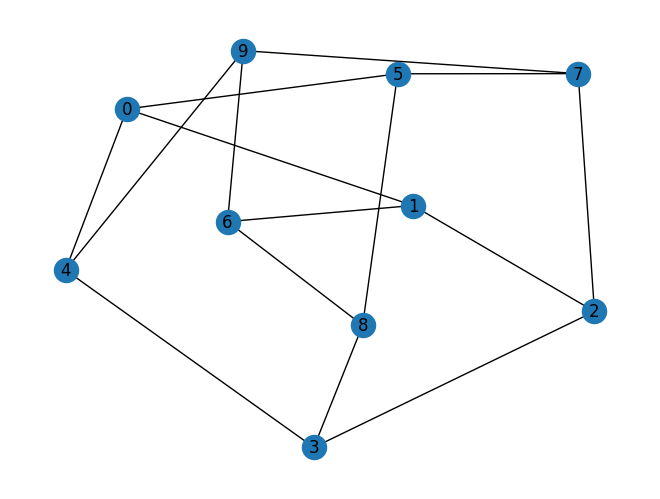

In [4]:
from find_cubic_local_mincut import *
import matplotlib.pyplot as plt

N, T = 10, 4

if G := generate_high_girth_cubic_graph(N, T, max_tries=1_000_000):
    nx.draw(G, with_labels=True)
else:
    print("No graph found")

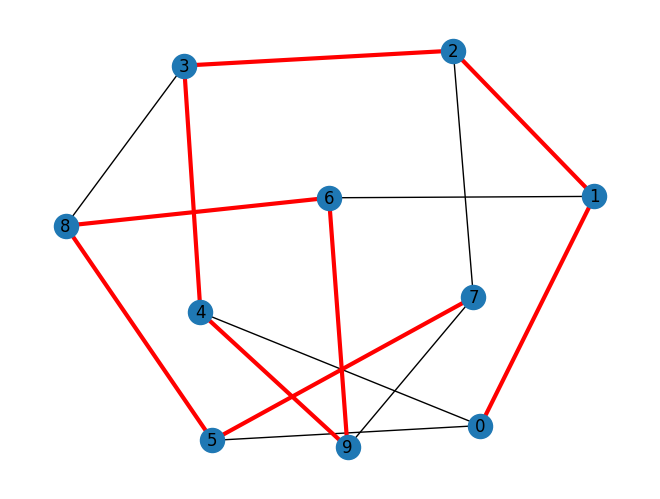

In [5]:
from cat_state_generation import *

p = next(find_all_hamiltonian_paths(G))
pos = nx.drawing.layout.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(
    G, pos=pos,
    edgelist=list(zip(p, p[1:])),
    edge_color='red', width=3.0
)

T = 4
N = 12


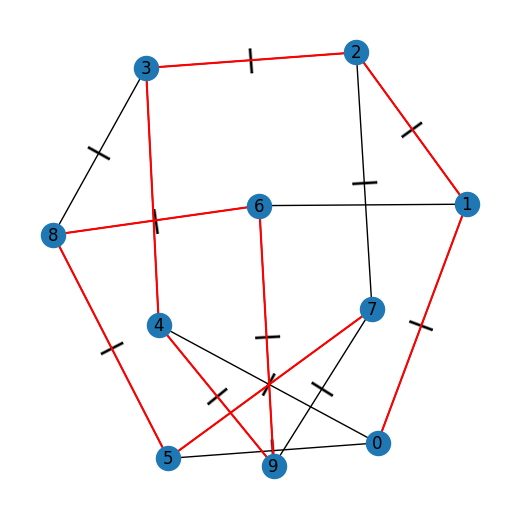

In [6]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
from pysat.formula import WCNF
from pysat.examples.rc2 import RC2

# --- 3. Run and Compare ---

# Create a graph
marker = GraphMarker(G, ham_path=list(zip(p, p[1:])), max_marks=12)

print("T = 4")
res1 = marker.solve_t_4()
print(f"N = {sum(v for k, v in res1.items())}")
visualize_cat_state_base(G, list(zip(p, p[1:])), res1)

# print("T = 5")
# res2 = marker.solve_problem_2()
# print(f"N = {sum(v for k, v in res2.items())}")
# visualize_markings(G, res2)
#
# print("T = 6")
# res3 = marker.solve_problem_3()
# print(f"N = {sum(v for k, v in res3.items())}")
# visualize_markings(G, res3)

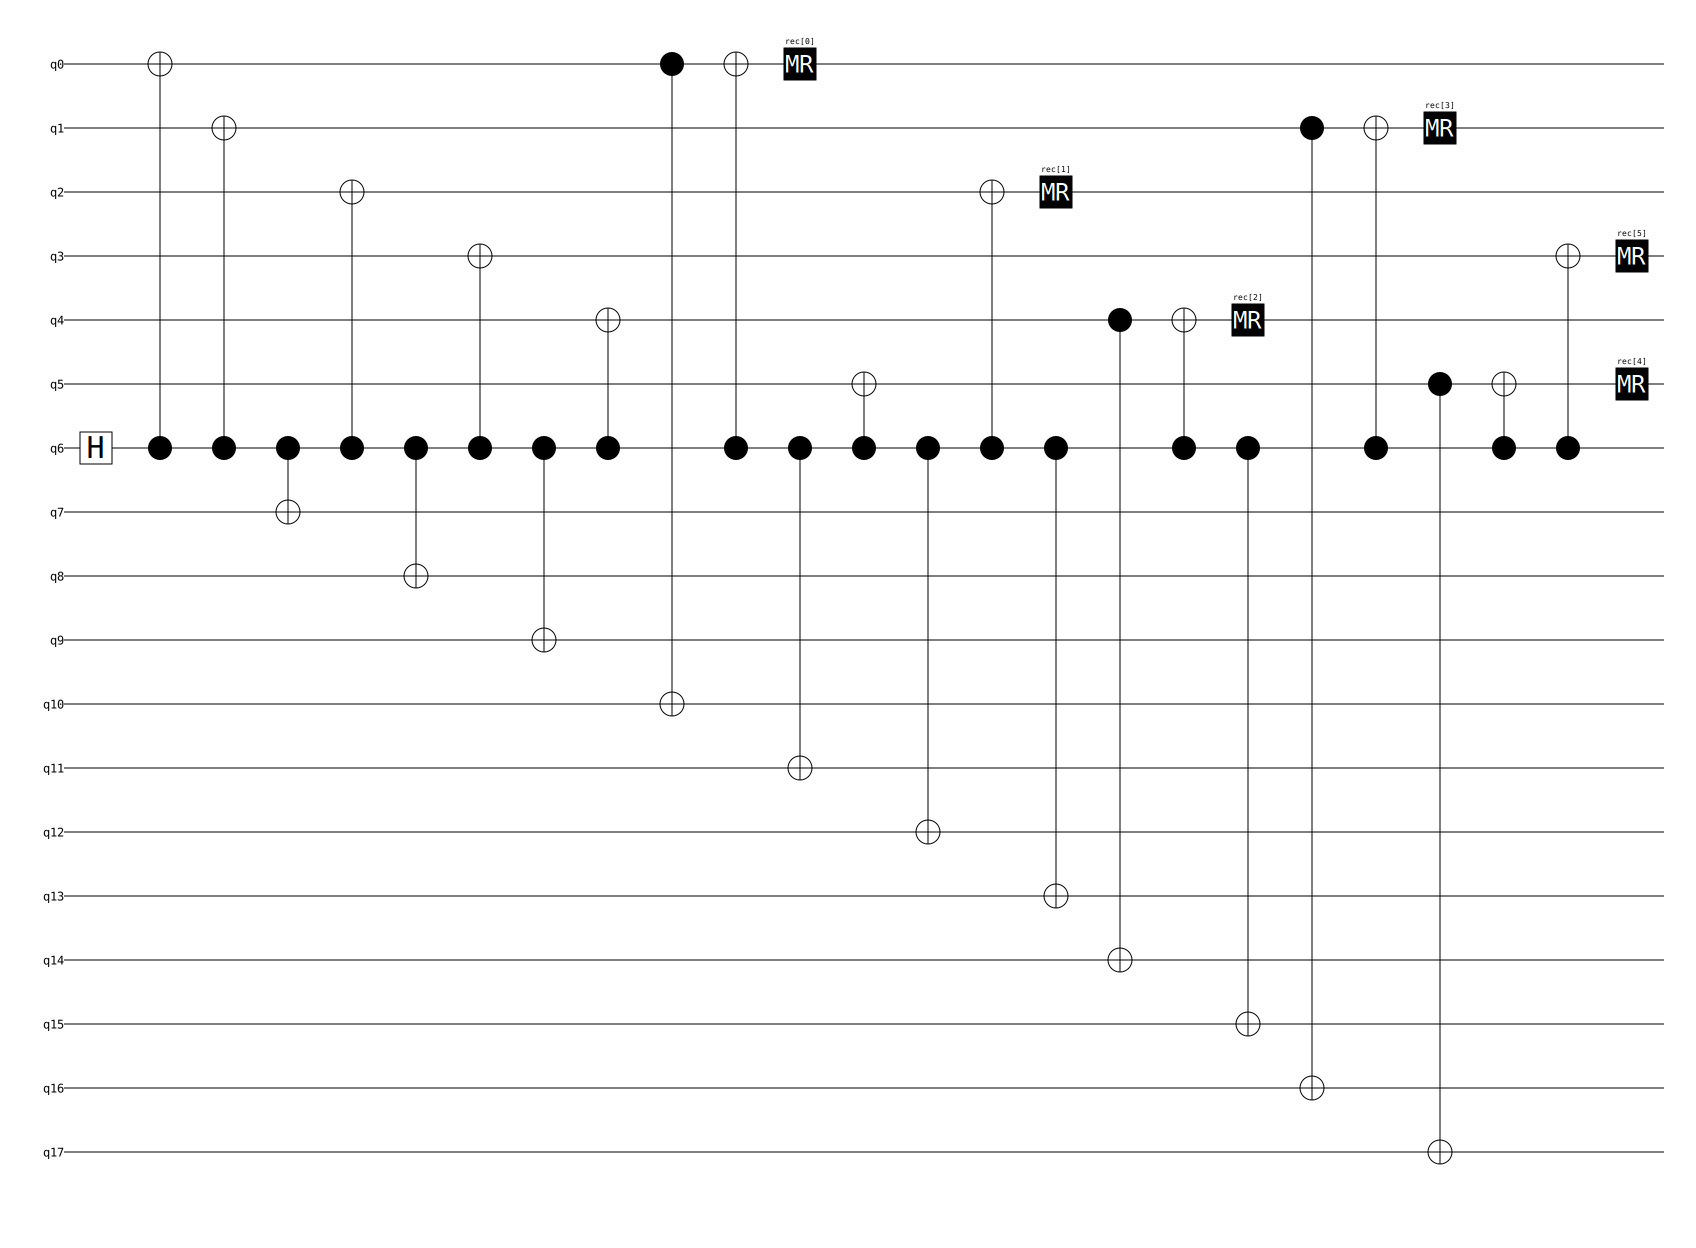

In [7]:
circ = cat_state_FT(12, 4)
circ.diagram('timeline-svg')

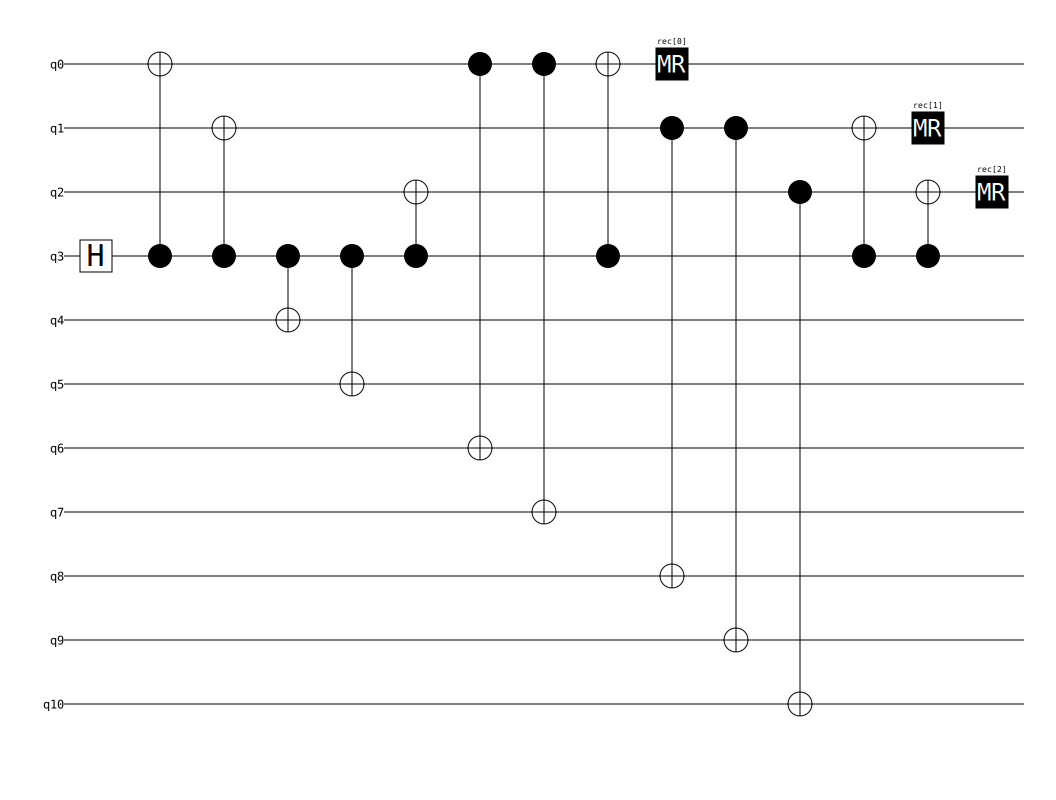

In [10]:
import stim


def sorted_pair(v1, v2):
    return (v1, v2) if v1 < v2 else (v2, v1)


circ = extract_circuit(G, list(zip(p, p[1:])), res1)
circ.diagram('timeline-svg')

In [96]:
circ.to_qasm(open_qasm_version=3)

'OPENQASM 3.0;\ninclude "stdgates.inc";\ndef mr(qubit q0) -> bit { bit b; measure q0 -> b; reset q0; return b; }\n\nqreg q[18];\ncreg rec[6];\n\nh q[6];\ncx q[6], q[0];\ncx q[6], q[1];\ncx q[6], q[7];\ncx q[6], q[2];\ncx q[6], q[3];\ncx q[6], q[8];\ncx q[6], q[4];\ncx q[6], q[9];\ncx q[1], q[10];\ncx q[6], q[1];\nrec[0] = mr(q[1]);\ncx q[6], q[5];\ncx q[6], q[11];\ncx q[2], q[12];\ncx q[6], q[2];\nrec[1] = mr(q[2]);\ncx q[6], q[13];\ncx q[4], q[14];\ncx q[6], q[4];\nrec[2] = mr(q[4]);\ncx q[6], q[15];\ncx q[6], q[0];\nrec[3] = mr(q[0]);\ncx q[5], q[16];\ncx q[3], q[17];\ncx q[6], q[5];\ncx q[6], q[3];\nrec[4] = mr(q[5]);\nrec[5] = mr(q[3]);\n'

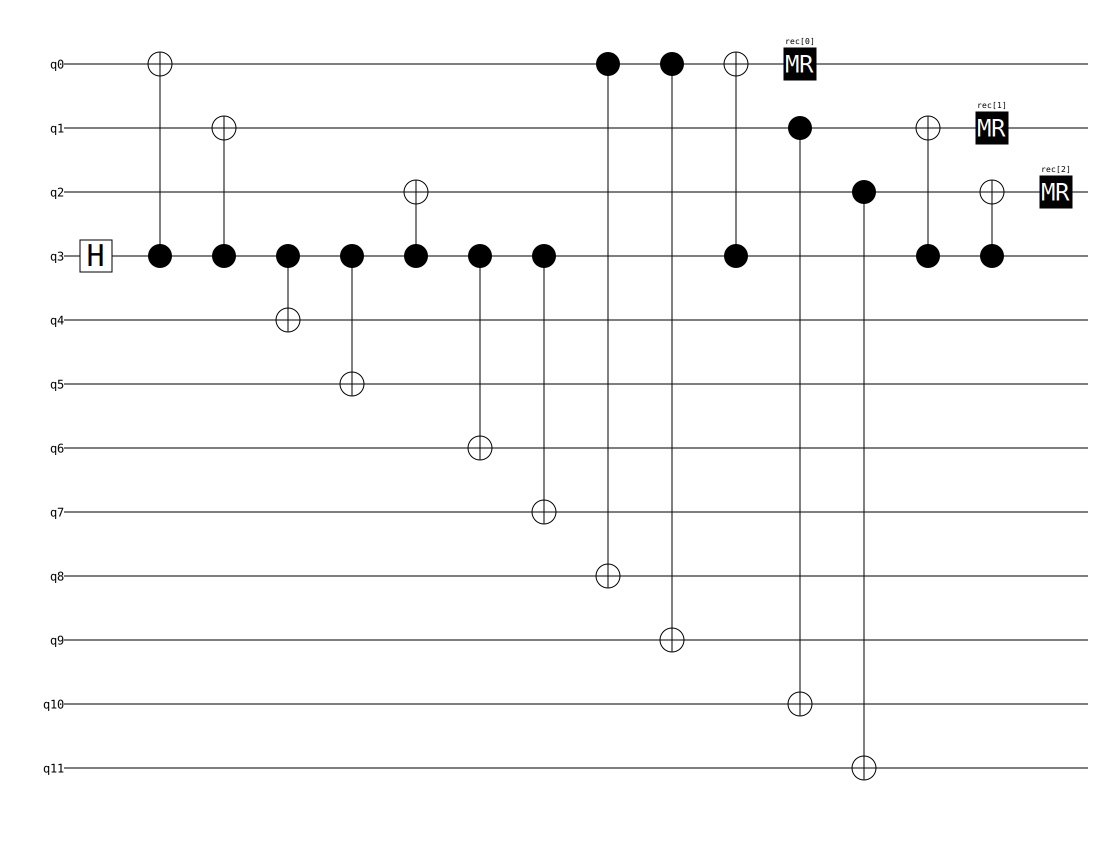

In [2]:
from cat_state_generation import cat_state_FT

cat_state_FT(9, 2).diagram('timeline-svg')